In [37]:
from sklearn.naive_bayes import GaussianNB
from utils import split_500_hits, show_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

| Model                      | DataSet | Time  | F1 Score | Scaling | Cross Score (Train/Test) | ROC AUC | Overfit | Underfit | Comment                          |
|:---------------------------|:-------:|:-----:|:--------:|:-------:|:------------------------:|---------|:-------:|:--------:|:---------------------------------|
| GaussianNB                 |   500   | 261ms |   0.83   |         |      0.7684/0.8365       | 0.7903  |         |    ✅     | Add features.                    |
| LogisticRegression         |   500   | 298ms |   0.83   |         |      0.7622/0.7356       | 0.8065  |         |    ✅     | Add features.                    |
| RandomForestClassifier     |   500   | 398ms |   0.90   |         |      0.8341/0.8365       | 0.8871  |    ✅    |          | Regulation required.             |
| SVC                        |   500   | 198ms |   0.90   |    ✅    |      0.8123/0.8670       | 0.8710  |         |    ✅     | Great model, but underfitting    |
| DecisionTreeClassifier     |   500   | 185ms |   0.81   |         |      0.7636/0.7634       | 0.7903  |    ✅    |          | Balanced model, but need improve |
| KNeighborsClassifier       |   500   | 156ms |   0.86   |    ✅    |      0.7581/0.8634       | 0.8145  |         |    ✅     | Add features.                    |
| ExtraTreesClassifier       |   500   | 314ms |   0.88   |         |      0.8179/0.8568       | 0.8548  |    ✅    |          | Regulation required.             |
| GradientBoostingClassifier |   500   | 91ms  |   0.87   |         |      0.8122/0.8065       | 0.8725  |    ✅    |          | Regulation required.             |

In [39]:
X_train, X_test, y_train, y_test = split_500_hits()

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        66
           1       0.68      0.78      0.72        27

    accuracy                           0.83        93
   macro avg       0.79      0.81      0.80        93
weighted avg       0.84      0.83      0.83        93

Accuracy:  0.8279569892473119


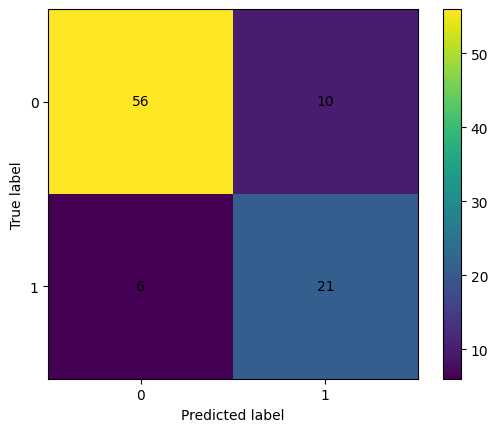

Confusion Matrix: 
 [[56 10]
 [ 6 21]]
Validation ROC AUC: 0.7903


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [40]:
gb_model = GaussianNB()
gb_model.fit(X_train, y_train)
y_gb_predict = gb_model.predict(X_test)

show_report(y_test, y_gb_predict)
roc_auc = roc_auc_score(y_test, y_gb_predict)
print(f'Validation ROC AUC: {roc_auc:.4f}')
f1_test = f1_score(y_test, y_gb_predict)
f1_train = f1_score(y_train, gb_model.predict(X_train))
print(f'F1 Train: {f1_train:.4f}, F1 Test: {f1_test:.4f}')

In [ ]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
y_lr_pred = lr_model.predict(X_test)
show_report(y_test, y_lr_pred)
roc_auc = roc_auc_score(y_test, y_lr_pred)
print(f'Validation ROC AUC: {roc_auc:.4f}')
f1_test = f1_score(y_test, y_lr_pred)
f1_train = f1_score(y_train, lr_model.predict(X_train))
print(f'F1 Train: {f1_train:.4f}, F1 Test: {f1_test:.4f}')

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_rf_pred = rf_clf.predict(X_test)
show_report(y_test, y_rf_pred)
roc_auc = roc_auc_score(y_test, y_rf_pred)
print(f'Validation ROC AUC: {roc_auc:.4f}')
f1_test = f1_score(y_test, y_rf_pred)
f1_train = f1_score(y_train, rf_clf.predict(X_train))
print(f'F1 Train: {f1_train:.4f}, F1 Test: {f1_test:.4f}')